<a href="https://colab.research.google.com/github/biswabijaya/puwsrm/blob/master/Deep%20Learning/Neural_Net_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating Basic Neural Network Structures and Practices in Google Colab
Hello, everyone, my name is [Yaw-Ling Lin](https://www.cs.pu.edu.tw/~yawlin/vita.html). 
This page is a colab practices set up for a quick look for beginners of machine learning practices and principles. I hope that you will enjoy the mental trips. Here are two ppt files that you might feel interested: [1906-yll-CNN](https://drive.google.com/file/d/12eZxhNyJeyIZ4fys-MLZsp_2_amdpB_Z/view?usp=sharing) and  [1905-yll-Facenet](https://drive.google.com/open?id=1_M2dDqzVmlFi9QLW2548JgtM8ekxvsrf)
This Python NB consists of 3 parts:
- Perceptron
- MNIST
- CNN demo links

This my self link: https://bit.ly/2ZxZSea

## Showing Colab VM OS status

---



---



In [0]:
#@ Bash codes for VM environments
!cat /etc/*release
!ps
!pwd
!du -l
!df

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.2 LTS"
NAME="Ubuntu"
VERSION="18.04.2 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.2 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
    PID TTY          TIME CMD
      1 ?        00:00:00 run.sh
     12 ?        00:00:00 node
     27 ?        00:00:01 jupyter-noteboo
    122 ?        00:00:00 tail
    133 ?        00:00:03 python3
    189 ?        00:00:00 ps
/content
8	./.config/configurations
48	./.config/logs/2019.05.31
52	./.config/logs
80	./.config
55508	./sample_data
55592	.
Filesystem     1K-blocks     Used Available Use% Mounted on
overlay        375674948 28847208 327674844   9% /
tmpfs            6667632        0   6667632 

## Confirm it is GPU/K80
- The following codes are taken from: https://colab.research.google.com/drive/18IHRqnzEiPIaw69xYbBX5Zcae19PYAky#scrollTo=-T9ReNFuD8eT&forceEdit=true&offline=true&sandboxMode=true

In [0]:
# Confirm it is GPU/K80
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12189090941306701913, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8858618253013670694
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1432079380372175026
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8837545890130692153
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# CNN Useful links
- [ConvNetJS](https://cs.stanford.edu/people/karpathy/convnetjs/) -- ConvNetJS is a Javascript library for training Deep Learning models (Neural Networks) entirely in your browser.  
- [CS231n](http://vision.stanford.edu/teaching/cs231n/): Convolutional Neural Networks for Visual Recognition
Spring 2019 
- VIP cheatsheets for Stanford's CS 229 Machine Learning
https://github.com/afshinea/stanford-cs-229-machine-learning
- VIP Deep Learning cheatsheets for Stanford's CS 230
https://github.com/afshinea/stanford-cs-230-deep-learning and
https://github.com/afshinea/stanford-cs-230-deep-learning/blob/master/en/super-cheatsheet-deep-learning.pdf 



# Perceptron 
-  Bargen: Perceptron in Python, March 26, 2013  https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
- 類別實作程式碼 https://www.zybuluo.com/hanbingtao/note/433855
- 感知器向量運算參考:   https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

In [0]:
from numpy import array, dot, random

training_data = [                               # 訓練資料集 
    (array([0,0,1]), 0),                        # 權重向量 w 包含 bias
    (array([0,1,1]), 0),                        # 訓練感知器做 AND 運算
    (array([1,0,1]), 0),
    (array([1,1,1]), 1),
]

total_errors = []                               # 各世代的訓練誤差值

unit_step = lambda x: 0 if x < 0 else 1         # 神經元激活函數

## class Perceptron

In [0]:
class Perceptron(object):
    def __init__(self, input_num):              # 感知器建構子
        self.weights = random.rand(input_num+1) # 啟始權重向量 w
    def __str__(self):                          # 列印感知器訓練結果
        return '權重向量 weights:%s\n' % (self.weights)
    def predict(self, input_vec):               # 感知器預測
        return unit_step(dot(self.weights, input_vec))
    def train(self, epochs, eta):               # 感知器訓練
        for i in range(epochs):
            errors = 0
            for (x, expected) in training_data:
                result = dot(self.weights, x)        # result = weight x
                error = expected - unit_step(result) # 計算訓練誤差值
                errors += abs(error)
                self.weights += eta * error * x
                print('世代: %d 目標:%f 輸出:%f 誤差:%f' % (i, expected, result, error))
                print(self)              # 印出感知器訓練後的權重向量  
            total_errors.append(errors)  # 記錄此世代的訓練誤差值


## Train Perceptron

世代: 0 目標:0.000000 輸出:0.641514 誤差:-1.000000
權重向量 weights:[0.2162474  0.58322899 0.44151367]

世代: 0 目標:0.000000 輸出:1.024743 誤差:-1.000000
權重向量 weights:[0.2162474  0.38322899 0.24151367]

世代: 0 目標:0.000000 輸出:0.457761 誤差:-1.000000
權重向量 weights:[0.0162474  0.38322899 0.04151367]

世代: 0 目標:1.000000 輸出:0.440990 誤差:0.000000
權重向量 weights:[0.0162474  0.38322899 0.04151367]

世代: 1 目標:0.000000 輸出:0.041514 誤差:-1.000000
權重向量 weights:[ 0.0162474   0.38322899 -0.15848633]

世代: 1 目標:0.000000 輸出:0.224743 誤差:-1.000000
權重向量 weights:[ 0.0162474   0.18322899 -0.35848633]

世代: 1 目標:0.000000 輸出:-0.342239 誤差:0.000000
權重向量 weights:[ 0.0162474   0.18322899 -0.35848633]

世代: 1 目標:1.000000 輸出:-0.159010 誤差:1.000000
權重向量 weights:[ 0.2162474   0.38322899 -0.15848633]

世代: 2 目標:0.000000 輸出:-0.158486 誤差:0.000000
權重向量 weights:[ 0.2162474   0.38322899 -0.15848633]

世代: 2 目標:0.000000 輸出:0.224743 誤差:-1.000000
權重向量 weights:[ 0.2162474   0.18322899 -0.35848633]

世代: 2 目標:0.000000 輸出:-0.142239 誤差:0.000000
權重向量 weights:[ 0.216

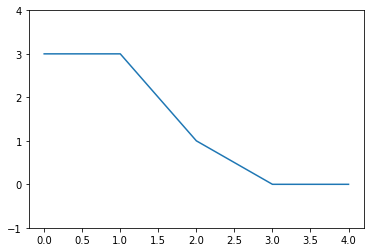

In [0]:
p = Perceptron(2)     # 宣告 2 個輸入的 AND-感知器
p.train(5, 0.2)       # 以資料集 training_data 訓練 5 個世代, 學習速率 0.2
print('訓練誤差值變化', total_errors)   # 印出每個世代的訓練誤差值

# 預測四種 AND 輸入狀況進行驗證
print ('1 and 1 = %d' % p.predict([1, 1, 1]))
print ('0 and 0 = %d' % p.predict([0, 0, 1]))
print ('1 and 0 = %d' % p.predict([1, 0, 1]))
print ('0 and 1 = %d' % p.predict([0, 1, 1]))

# 訓練誤差值變化繪圖
from pylab import plot, ylim
ylim([-1,4])
plot(total_errors)


# MNIST
 - http://yann.lecun.com/exdb/mnist/
 - Trains a simple deep NN on the MNIST dataset. 
 - Gets to 98.40% test accuracy after 20 epochs (there is *a lot* of margin for parameter tuning).
 - 2 seconds per epoch on a K520 GPU.
 - NB: this code is taken from [here](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py) on Mar-10-2019

In [0]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
NB: this code is taken from https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py on Mar-10-2019
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train_img, y_train_lab), (x_test_img, y_test_lab) = mnist.load_data()

x_train = x_train_img.reshape(60000, 784)
x_test = x_test_img.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_lab, num_classes)
y_test = keras.utils.to_categorical(y_test_lab, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

W0619 03:11:58.585118 140136388589440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 03:11:58.589945 140136388589440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 03:11:58.598109 140136388589440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 03:11:58.613635 140136388589440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0619 03:11:58.622374 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

W0619 03:11:58.703070 140136388589440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 03:11:58.711437 140136388589440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0619 03:11:58.820984 140136388589440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2434 - acc: 0.9263 - val_loss: 0.1084 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1027 - acc: 0.9686 - val_loss: 0.0797 - val_acc: 0.9740
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0733 - acc: 0.9776 - val_loss: 0.0739 - val_acc: 0.9793
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0615 - acc: 0.9820 - val_loss: 0.0723 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0808 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0440 - acc: 0.9872 - val_loss: 0.0749 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.0712 - val_acc

In [0]:
history

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10517008998441868
Test accuracy: 0.985


In [0]:
PD = model.predict( x_test )
pred_test= [np.argmax(y) for y in PD]
A = [pred_test[i] for i in [13, 214, 719]]
print(A)

confusion = tf.confusion_matrix(y_test_lab, pred_test)

with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion,feed_dict=None, session=None))


[0, 9, 4]
Confusion Matrix: 

 [[ 971    1    0    1    1    0    2    3    1    0]
 [   0 1130    2    0    0    1    1    1    0    0]
 [   2    0 1021    2    1    0    1    5    0    0]
 [   0    0    2  994    0    1    0    7    0    6]
 [   1    1    5    0  962    0    3    2    0    8]
 [   2    0    0    8    1  873    3    1    1    3]
 [   3    2    0    1    4    2  946    0    0    0]
 [   1    1    8    0    0    0    0 1013    1    4]
 [   4    1    4    1    3    2    4    4  945    6]
 [   1    2    0    2    6    1    0    2    0  995]]


In [0]:
len(y_test)
test_predictions

array([[0.00000000e+00, 4.28510802e-32, 2.49176551e-28, ...,
        1.00000000e+00, 8.27020402e-38, 1.49353171e-27],
       [0.00000000e+00, 2.22045005e-31, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.25881256e-27, 1.00000000e+00, 6.60048705e-20, ...,
        4.00516273e-16, 1.15678326e-19, 7.38690091e-26],
       ...,
       [0.00000000e+00, 1.03655195e-23, 9.68526765e-32, ...,
        7.71873166e-18, 9.50155942e-25, 3.34159130e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.01335616e-37, 1.75922835e-25, 0.00000000e+00],
       [1.28428870e-32, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03361533e-36, 0.00000000e+00]], dtype=float32)

In [0]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
x_train[55]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## def plot_imag

In [0]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示.  
    plt.show()  

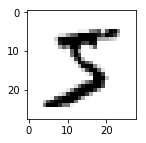

In [0]:
plot_image(x_train_img[0])

## def plot_images_labels_predict

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "lab={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "lab={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show() 

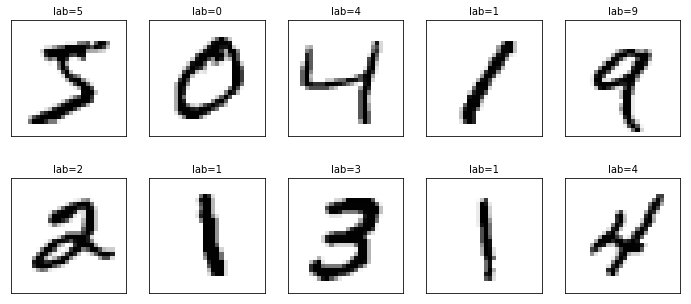

In [0]:
plot_images_labels_predict( x_train_img, y_train_lab, [], 0, 10)

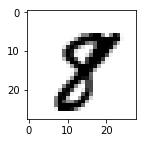

array([7.9970262e-25, 7.3233676e-14, 2.8187777e-17, 2.5199609e-16,
       2.8302888e-22, 1.9751406e-18, 5.6351995e-26, 8.1853567e-18,
       1.0000000e+00, 2.1055393e-15], dtype=float32)

In [0]:
plot_image(x_train_img[55])
model.predict( x_train )[55]


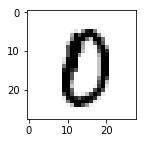

array([1.0000000e+00, 2.2790023e-23, 2.8897447e-16, 7.5743057e-29,
       5.7765640e-26, 1.1434616e-22, 1.2795654e-16, 1.5510005e-22,
       1.0175378e-18, 8.5648221e-22], dtype=float32)

In [0]:
plot_image(x_test_img[55])

model.predict( x_test )[55]

In [0]:
x_test[55]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

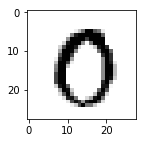

Image[013]:Pred(0) ['1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


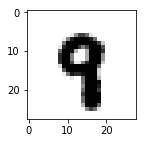

Image[214]:Pred(9) ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00']


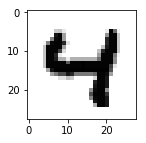

Image[719]:Pred(4) ['0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00']


In [0]:
PD = model.predict( x_test )

for i in [13, 214, 719] :
   plot_image(x_test_img[i])
   print( "Image[%03d]:Pred(%d)" % (i, pred_test[i]), ['%.2f' % v for v in PD[i] ],  )

Image[55]: ['1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


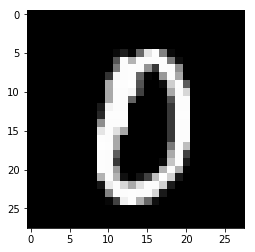

Image[77]: ['0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


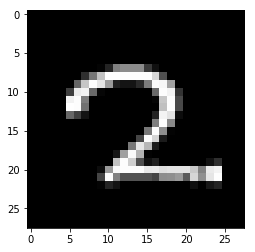

Image[173]: ['0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']


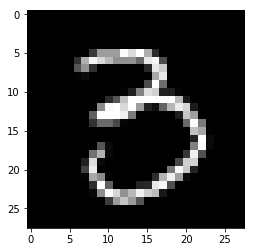

In [0]:
import numpy as np
import matplotlib.pyplot as plt
PD = model.predict( x_test )

for i in [55, 77, 173] :
   image = np.array( x_test[i], dtype='float' )
   pixels = image.reshape((28, 28))
   plt.imshow(pixels, cmap='gray')
   print( "Image[%d]:" % i, ['%.2f' % v for v in PD[i] ] )
   plt.show()
   #print(PD[i])

# Temporay Testing codes in the following

In [0]:
LIST = [i for i in range(9)]
LIST

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


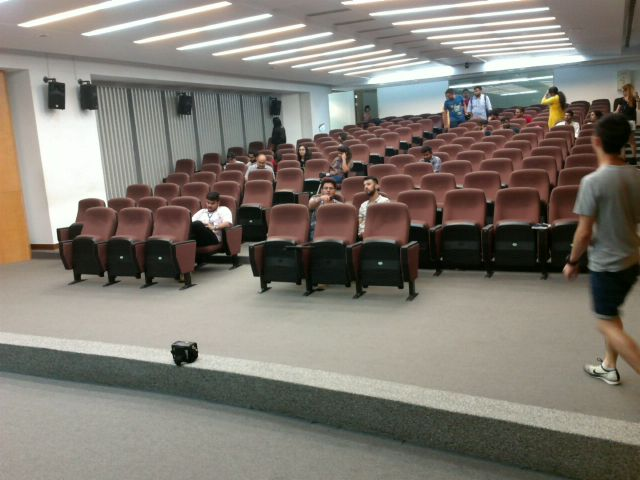

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))